In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from mpl_toolkits.mplot3d import Axes3D #3d plots
from sklearn.neighbors import NearestNeighbors 
import os
import math #math fun


In [5]:
data=pd.read_csv("/home/tincho/Desktop/osc15-EST-01.csv",sep=";",decimal=",")
data.head()

Tiempo  Velocidad         R        T
0  0.003022  30.207969  26914.57  9107.59
1  0.004030  29.888208  26914.57  9075.75
2  0.005037  29.569110  26830.73  9043.91
3  0.006045  29.250706  26914.57  9012.07
4  0.007052  28.933022  27249.93  9012.07

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.columns

Index(['Tiempo', 'Velocidad', 'R', 'T'], dtype='object')

In [8]:
datosNP=data.to_numpy()

In [10]:
Tiempo=np.float64(datosNP[:,0])
Velocidad=np.float64(datosNP[:,1])
R=np.float64(datosNP[:,2])
T=np.float64(datosNP[:,3])

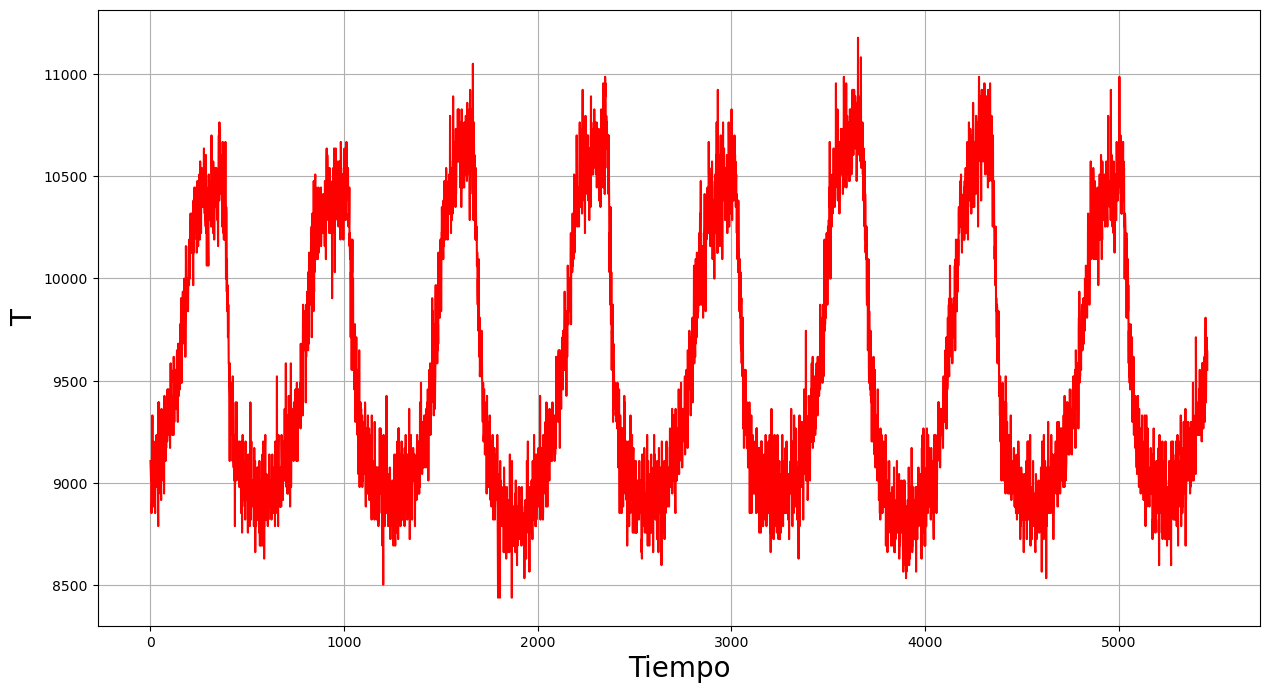

In [11]:
plt.figure(figsize=(15,8),)
plt.xlabel('Tiempo', fontsize=20)
plt.ylabel('T', fontsize=20)
plt.plot(T, color = 'red')
plt.grid()
plt.show()

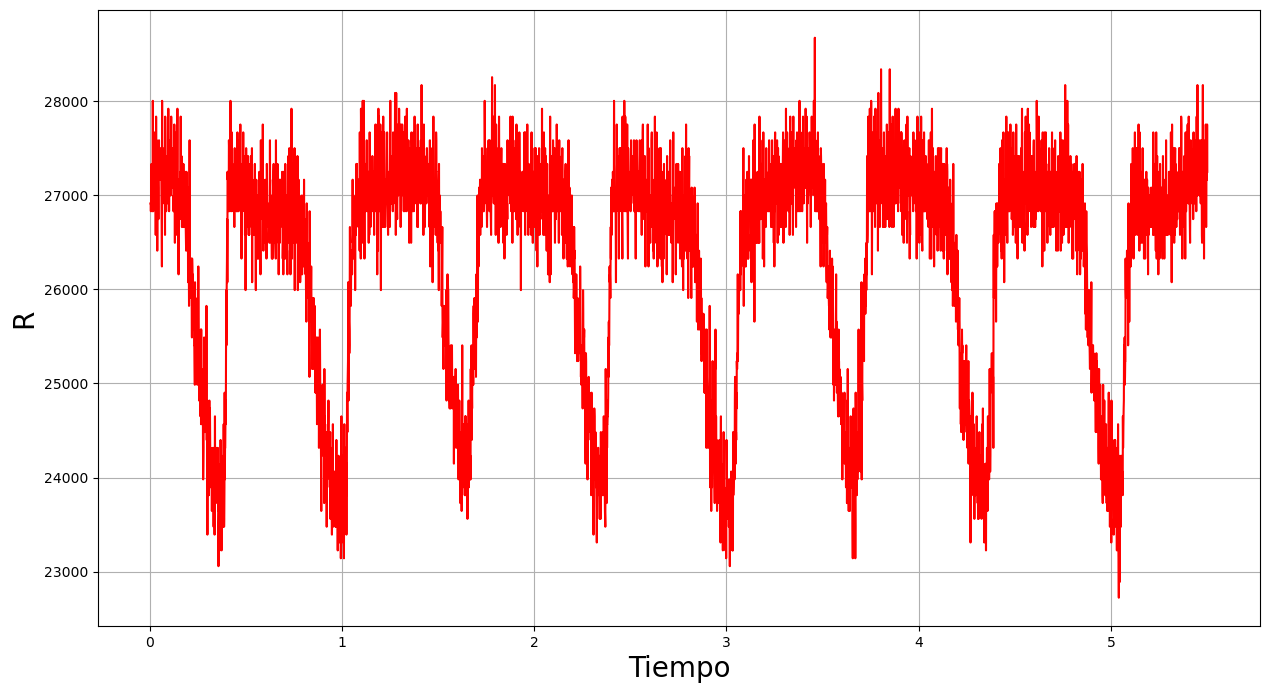

In [13]:
plt.figure(figsize=(15,8),)
plt.xlabel('Tiempo', fontsize=20)
plt.ylabel('R', fontsize=20)
plt.plot(Tiempo,R, color = 'red')
plt.grid()
plt.show()

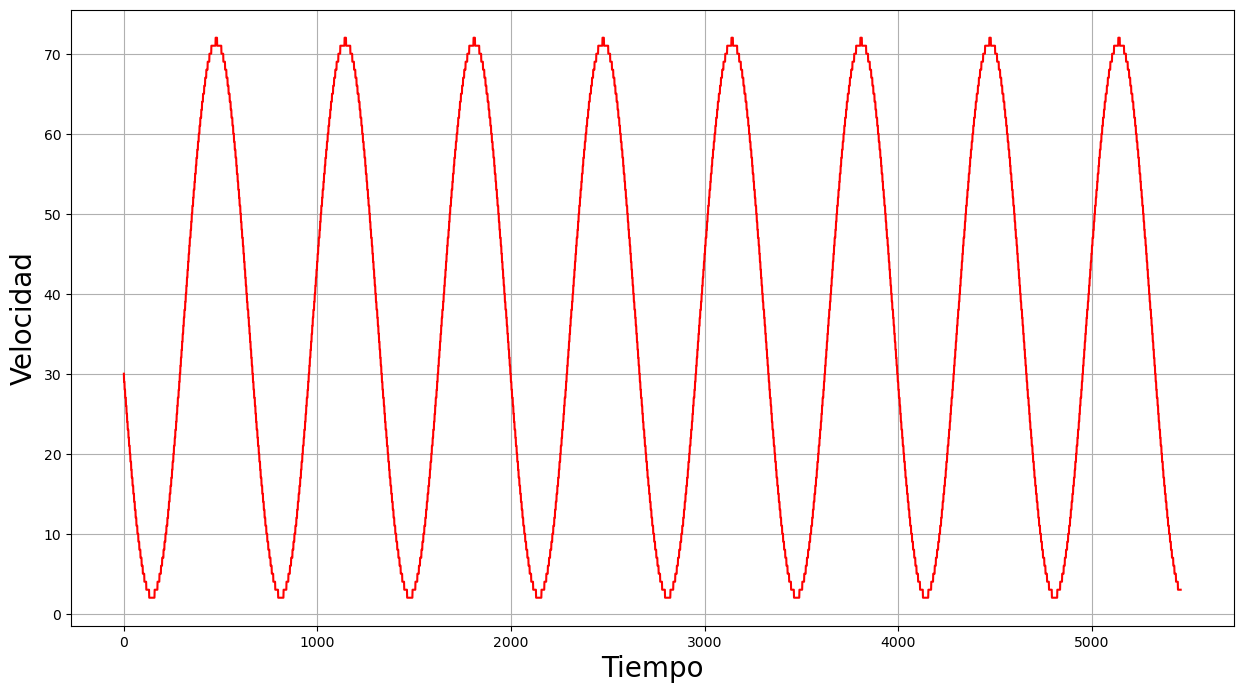

In [10]:
plt.figure(figsize=(15,8),)
plt.xlabel('Tiempo', fontsize=20)
plt.ylabel('Velocidad', fontsize=20)
plt.plot(Velocidad, color = 'red')
plt.grid()
plt.show()

<ipython-input-14-d002a0fa241f>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data['R'],model='additive', freq=40)


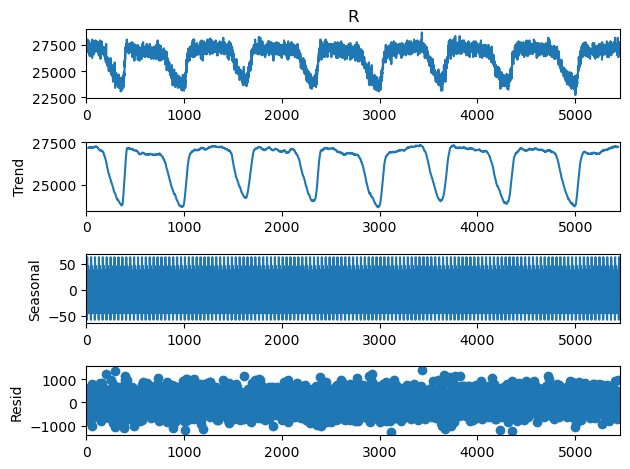

In [14]:
descomposicion = sm.tsa.seasonal_decompose(data['R'],model='additive', freq=40)  
fig = descomposicion.plot()

plt.show()

<ipython-input-15-4a04ca33172b>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data['T'],model='additive', freq=30)


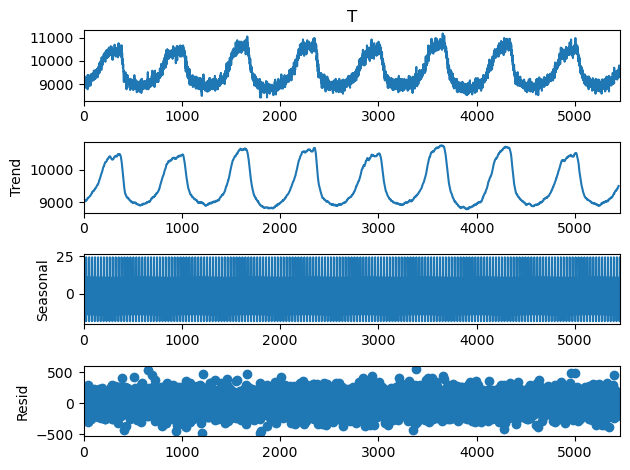

In [15]:
descomposicion = sm.tsa.seasonal_decompose(data['T'],model='additive', freq=30)  
fig = descomposicion.plot()

plt.show()

<ipython-input-13-736007f64a96>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data['R'],model='multiplicative', freq=50)


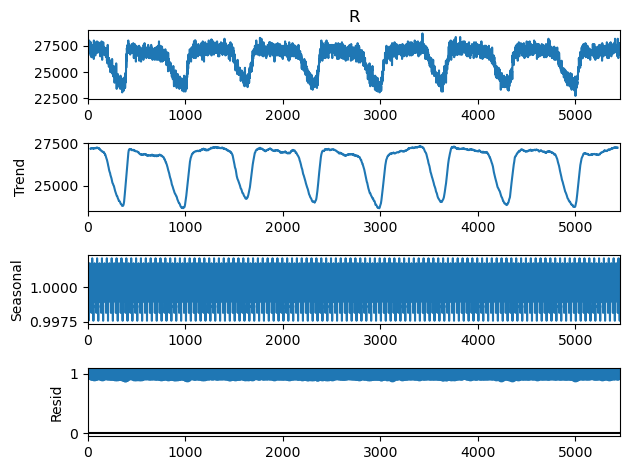

In [13]:
descomposicion = sm.tsa.seasonal_decompose(data['R'],model='multiplicative', freq=50)  
fig = descomposicion.plot()

plt.show()

<ipython-input-18-b1fe48a7cb01>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data['T'],model='multiplicative', freq=50)


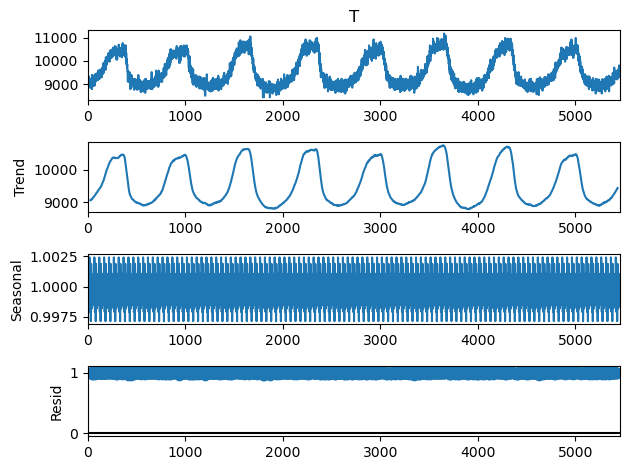

In [18]:
descomposicion = sm.tsa.seasonal_decompose(data['T'],model='multiplicative', freq=50)  
fig = descomposicion.plot()

plt.show()

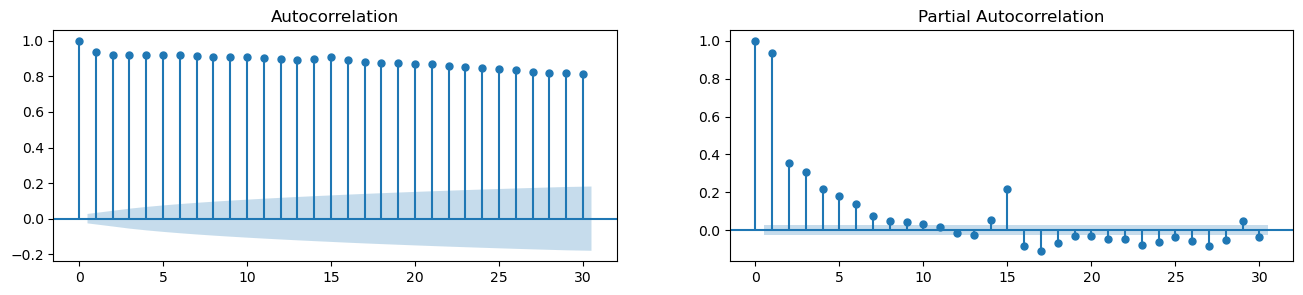

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf





# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(R.tolist(), lags=30, ax=axes[0])
plot_pacf(R.tolist(), lags=30, ax=axes[1])

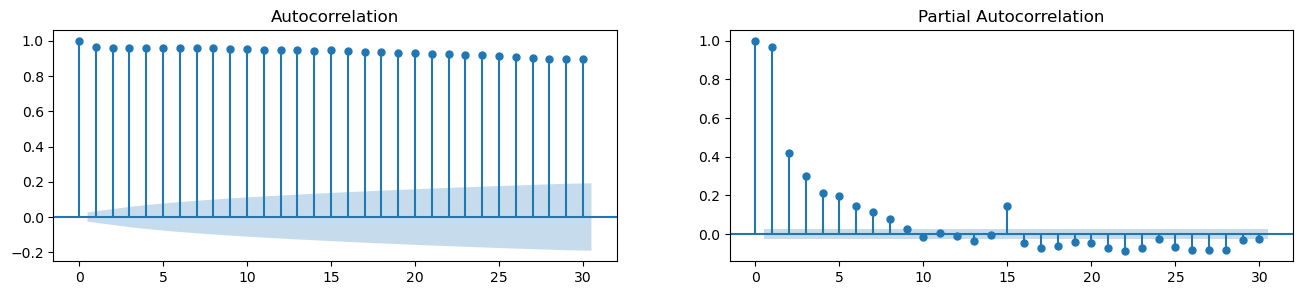

In [19]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(T.tolist(), lags=30, ax=axes[0])
plot_pacf(T.tolist(), lags=30, ax=axes[1])

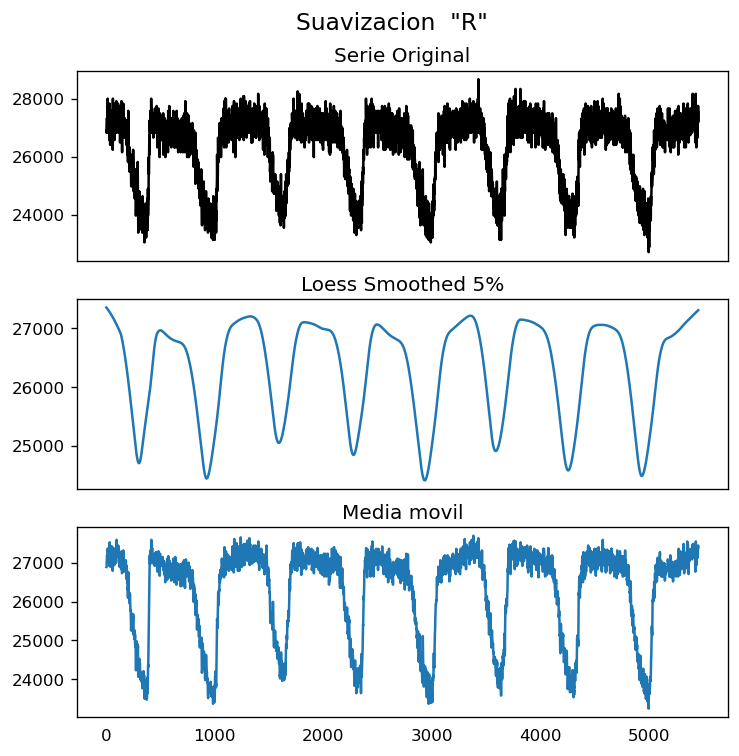

In [21]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = data

# 1. Moving Average
df_ma = df_orig.R.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.R, np.arange(len(df_orig.R)), frac=0.05)[:, 1], index=df_orig.index, columns=['R'])
#df_loess_15 = pd.DataFrame(lowess(df_orig.R, np.arange(len(df_orig.R)), frac=0.15)[:, 1], index=df_orig.index, columns=['R'])
# Plot
fig, axes = plt.subplots(3,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['R'].plot(ax=axes[0], color='k', title='Serie Original')
df_loess_5['R'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_ma.plot(ax=axes[2], title='Media movil')
fig.suptitle('Suavizacion  "R"', y=0.95, fontsize=14)
plt.show()

In [27]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = data

# 1. Moving Average
df_ma = df_orig.T.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.T, np.arange(len(df_orig.T)), frac=0.05)[:, 1], index=df_orig.index, columns=['R'])
#df_loess_15 = pd.DataFrame(lowess(df_orig.R, np.arange(len(df_orig.R)), frac=0.15)[:, 1], index=df_orig.index, columns=['R'])
# Plot
fig, axes = plt.subplots(3,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['R'].plot(ax=axes[0], color='k', title='Serie Original')
df_loess_5['R'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_ma.plot(ax=axes[2], title='Media movil')
fig.suptitle('Suavizacion  "R"', y=0.95, fontsize=14)
plt.show()

ValueError: endog must be a vector

/home/tincho/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


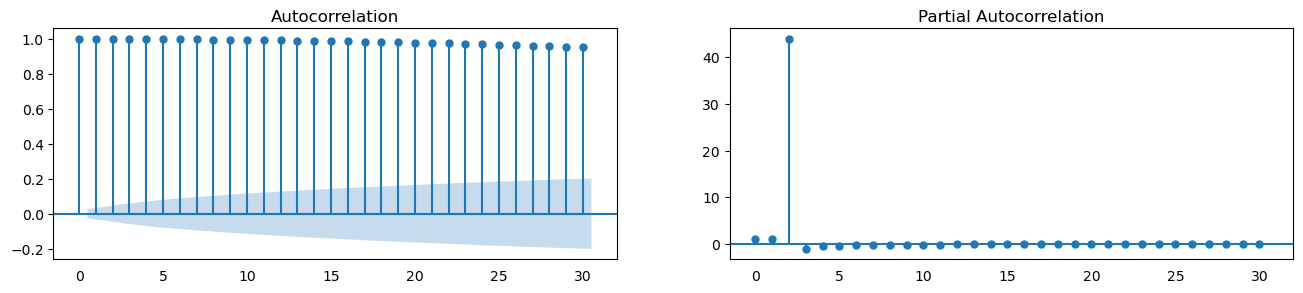

In [35]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_loess_5['T'].tolist(), lags=30, ax=axes[0])
plot_pacf(df_loess_5['T'].tolist(), lags=30, ax=axes[1])

In [ ]:
#Hago componentes principales y luego FFT
#Script Horacio

In [28]:
X=np.c_[R,T]

In [29]:
xraya=np.mean(X,0)
B=X-xraya
Bt=np.transpose(B)
N=len(R)
A=(Bt@B)/N
A

array([[1402941.04074842, -658175.50211014],
       [-658175.50211014,  420811.17364082]])

In [30]:
E=np.linalg.eigh(A)
print(E[0])
print(E[1])

[  90694.17817759 1733058.03621165]
[[-0.4483315  -0.89386737]
 [-0.89386737  0.4483315 ]]


In [31]:
V=np.flip(E[1],1)

In [32]:
Z=B@V

In [33]:
z1=Z[:,0]
z2=Z[:,1]

In [34]:
from scipy.signal import butter, lfilter, freqz
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
# Parámetros de filtro.
order = 2
fs = 16377.87       # taza de muestreo, en Hz se lo sabe del equipo
cutoff = 1000.0  # frecuencia de corte, Hz
# coeficientes del filtro}
b, a = butter_lowpass(cutoff, fs, order)


In [35]:
# ahora se filtra los datos,,,
z1_f = butter_lowpass_filter(z1, cutoff, fs, order)

In [36]:
z1_fft=np.fft.fft(z1_f)

In [37]:
freq = np.fft.fftfreq(Tiempo.shape[-1])

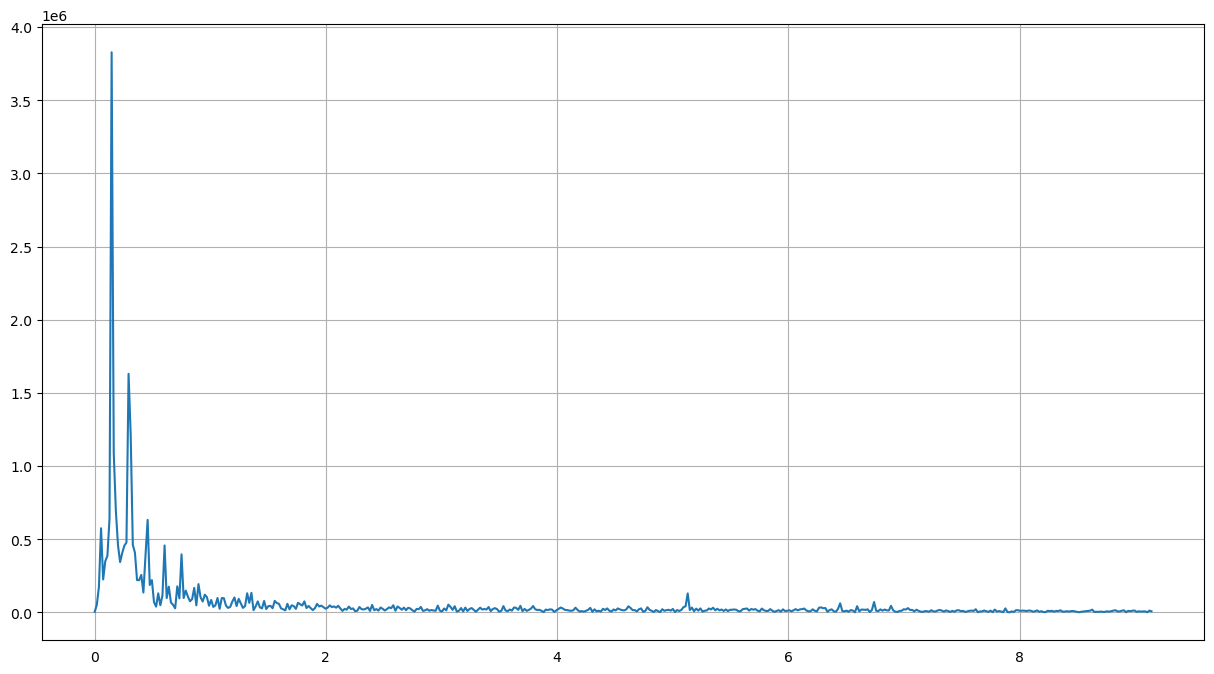

In [39]:
plt.figure(figsize=(15,8))
plt.plot(100*freq[0:500],np.abs(z1_fft[0:500]))
plt.grid()
plt.show()